# Assignment 7: Intro To Keras With Feed Forward NNs and Theory Recap

### PART I - THEORY RECAP

Answer the following review questions below. The questions are based off material seen in previous lectures/assignments, but some concepts were only briefly mentioned! If you can't find an answer from the lecture slides, a quick search online should be very helpful (i.e. always search online first before panicking :) )

### 1 - Linear vs Polynomial Regression
- Describe both Linear Regression and Polynomial Regression (3 lines or less each).

- Describe overfitting vs underfitting with respect to parameters.  


In [1]:
### YOUR ANSWER HERE - YOUR MAY USE MARKDOWN, LATEX, CODE, DIAGRAMS, ETC

Linear regression maps a feature space to a continuous output by assuming the data distribution is inherently linear with some Gaussian noise. Hence, the output of the regression model is linear with respect to its features, e.g. $y = m_0 + m_1 x_1 + m_2 x_2 + ... + m_n x_n$

Polynomial regression is similar to linear regression, as it also maps your feature space to a continuous output, but we attempt to model the data distribution using a polynomial function rather than an affine/linear model, e.g. $y = m_0 + m_1 x_1 + m_2 x_2^2 + m_2 x_2^2 + ... + m_n x_n^n$

Overfitting vs Underfitting: We investigate the case where we think our feature space can be augmented using a polynomial kernel, that is, if our feature space is $x$, we assume $f(x) = m_0 + m_1 x + m_2 x^2 + m_3 x^3 + ... + m_n x^n$. Since the polynomial degree $n$ is unknown, we attempt to fit our data using different $n$s. If $n_{hypothesis} < n_{true}$, then the model fails to capture the complexity of the data. This is denoted as *underfitting*.  On the other hand, if the hypothesized $n_{hypothesis} > n_{true}$, then we end up capturing too much noise from over-complexity of the model: *overfitting*. One may use regularization techniques to penalize the complexity of the model and regularize weights. A basic overview can be found here:
https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c

### 2 - Logistic Regression vs. Linear SVM
- Describe how logistic regression works (3 lines or less)
- Describe how linear SVM works. Mention the role(s) of:
    - support vectors
    - margin
    - slack variables
    - kernels
- Plot an example for SVM where the linear kernel is not enough to separate the data, but another kernel works

In [2]:
## YOUR ANSWER HERE - YOUR MAY USE MARKDOWN, LATEX, CODE, DIAGRAMS, ETC

**Logistic Regression** 
Logistic Regression is actually a classification model that maps a linear model that best fits a set of data points, where we use a thresholding function called a sigmoid function to determine which class each data point should be. 

**Linear SVM**
Linear SVM can be used for regression, but is mostly used for classification tasks. Our objective is to find a hyperplane (boundary) that has the maximum margin, i.e the maximum distance between data points of two classes. 

Support vectors are data points that are closest to the hyperplane and influence the position and orientation of the hyperplane. Using these support vectors, we maximize the margin of the classifier. Deleting the support vectors will change the position of the hyperplane.

These are the points that help us build our SVM. If there exists no hyperplane that perfectly separates the classes, we may use what we call slack variables, that soften the misclassification cost of a datapoint.

Kernels are, at a high level, any function $K$ which corresponds to a dot product for some feature mapping $\phi $, such that $K(x_1, x_2) = \phi (x_1) . \phi(x_2)$ . Instead of trying to directly find a hyperplane that separates the original feature space (corresponds to using a linear kernel), we attempt to find the optimal hyperplane on an alternate feature space, i.e. from $X \rightarrow \phi(X)$. Since to compute the hyperplane, we need to apply the dot product, we use an equivalent kernel that would be more efficient than computing a dot product between two transformed points, i.e. it's easier to compute $K(x_1, x_2)$ than $\phi (x_1) . \phi(x_2)$.

### 3 - Linear SVM vs k-NN
- K-Nearest Neighbours is a popular unsupervised learning algorithm. Explain the difference between supervised and unsupervised learning?
- K-NN is an example of a lazy learning algorithm. Why is it called so. What could be a use case? Justify using a lazy learning algorithm in that case.
- Outline the main steps for the KNN algorithm. Use text, code, plots, diagrams, etc as necessary.  
- Plot a example dataset which works in an SVM classification and not k-NN classification. Repeat for the reverse scenario.

In [3]:
## YOUR ANSWER HERE - YOUR MAY USE MARKDOWN, LATEX, CODE, DIAGRAMS, ETC

**Supervised Learning**
Supervised learning encompasses classification and regression tasks. For both, we are provided both the features and the labels/ target variables. In the case of classification, we wish to map our feature space to a discrete output, whereas the output of regression is continuous.

**Unsupervised Learning**
The most common tasks within unsupervised learning are clustering, representation learning, and density estimation. In all of these cases, we wish to learn the inherent structure of our data without using explicitly-provided labels.

**k Nearest Neighbours**
Given a dataset $X$, define a distance metric $d$ , e.g. Euclidean distance. There is no training involved. At prediction time, we wish to label $x_{test}$ by iterating through the points in $X$. We find the $k$ closest points (defined by $d$) in $X$ to $x_{test}$ and classify it based on a majority vote (based on $k$ neighbours, which class is the most common?).

**Lazy Learners**
Lazy learning is a learning method in which generalization of the training data is, in theory, delayed until a query is made to the system, as opposed to in eager learning, where the system tries to generalize the training data before receiving queries. For example, the logistic regression algorithm learns its model weights (parameters) during training time. In contrast, there is no training time in K-NN. Although this may sound very convenient, this property doesn’t come without a cost: The “prediction” step in K-NN is relatively expensive! Each time we want to make a prediction, K-NN is searching for the nearest neighbor(s) in the entire training set.

### 5 - Ensemble Methods
- Explain bagging and boosting. Clearly illustrate the difference between these methods. When would you use either one?
- What is a decision tree? What is a random forest? Compare them and list 3 pros and cons of each?

In [4]:
## YOUR ANSWER HERE - YOUR MAY USE MARKDOWN, LATEX, CODE, DIAGRAMS, ETC

Ensemble methods, as a whole, is the method of building complex classifiers from simple ones. We wish to run one or more base learning algorithms multiple times, then combine the predictions of the different learners to get a final prediction.

**Bagging**
We construct several classifiers independently (in parallel), and give each classifier a slightly randomized subset of the original dataset (sample with replacement, aka bootstrapping) Then, at prediction time, we use a majority vote to decide which class the test data belongs to. In regression tasks, we take the average prediction from each classifier. More information on bootstrapping can be found here: https://machinelearningmastery.com/a-gentle-introduction-to-the-bootstrap-method/

**Boosting**
We sequentially build a complex classifier, by feeding the output of one classifier into the next, re-weighting the training examples from the previous classifier. More weight is put on examples that were misclassified. A high-level algorithm is provided below.

1. Use the training set to train a simple predictor.
2. Re-weight the training examples, putting more weight on examples that were not properly classified in the previous predictor
3. Repeat n times.
4. Combine the simple hypotheses into a single, accurate predictor.

**Decision Trees vs Random Forests**
Decision trees are classification algorithms that classify data points based on test-splits at each node of the tree. Geometrically, this partitions the dataset via orthogonal splits along the feature space's axes. Random forests are simply a collection of decision trees (bagging method), where each tree learns what features to split on via slightly different, randomized subsets of the original feature space.

**Decision Tree Pros/Cons**
* Interpretable/ reproducible
* Faster
* Prone to overfitting (high variance)
* Greedy algorithm, so might not find global optima that reduces error since it looks for the optimal test node-by-node

**Random Forests Pros/Cons**
* reduce variance, so less overfitting
* less sensitve to noise
* Less interpretable than decision trees

### 6 - PCA
- Describe how PCA achieves dimensionality reduction. Outline the main steps of the algorithm
- What is the importance of eigenvectors and eigenvalues in the PCA algorithm above.
- When we compute the covariance matrix in PCA, we have to subtract the mean. Why do we do this?

In [5]:
## YOUR ANSWER HERE - YOUR MAY USE MARKDOWN, LATEX, CODE, DIAGRAMS, ETC

**PCA for Dimensionality Reduction**
PCA attempts to project an original feature space $X$ of dimension $n$ to a linear subspace of dimension $n'$, where $n' < n$. This is done by computing the eigenvectors of the covariance matrix of $X$, $\Sigma(X)$. We then project $X$ onto the $n'$ eigenvectors of $\Sigma$ with the highest variance. 

**Eigenvalues and eigenvectors**
The eigenvectors from $\Sigma$ correspond to the directions along which we have the highest variance, so we wish to project our feature space onto these eigenvectors. To find the highest variance, we look at the corresponding eigenvalues.

**Why do we subtract the mean?**
As described in previous lectures, the variance of a given variable is defined with respect to its distribution's mean. Hence, we get rid of the mean for all variables to center our data at the origin, which also conveniently reduces our covariance matrix equation. From this, we can directly read off the eigenvectors and eigenvalues of our "cleaned" covariance matrix.

### PART II - FEED FORWARD NEURAL NETWORKS WITH KERAS

In this section, we will be using the [Keras Deep Learning Library](https://keras.io/) to train a feed forward neural network. Please refer to class demo and documentation for instructions on how to use the library.

In [17]:
# Import the following libraries
%matplotlib inline

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from keras.layers import Dropout
import numpy as np
import matplotlib.pyplot as plt

#### 1 - Load Dataset
We will be using the MNIST dataset which contains photos of handwritten digits. Keras already comes with this dataset, so we can load it directly with library functions as follows:

In [18]:
# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#### 2 - Inspect Data
Start by inspecting the data. Write code to output the following: 
- The shape of the training data
- The shape of the testing data
- The total number of outputs
- A lit of the output classes
- Display the first image in the training data
- Display the first image in the training data

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5,1,'Ground Truth : 7')

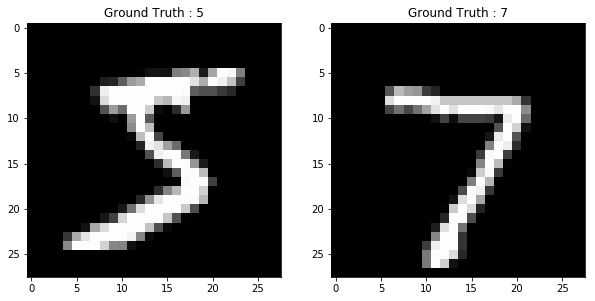

In [19]:
### ======== YOUR CODE HERE ========== ###

# Print shape of training data
print('Training data shape : ', train_images.shape, train_labels.shape)
 
# Print shape of testing data    
print('Testing data shape : ', test_images.shape, test_labels.shape)
 
# Print the total number of outputs
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)

# Print the list of output classes
print('Output classes : ', classes)
 
# Display the first image in the training data    
plt.figure(figsize=[10,5])
 
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))
 
# Display the first image in the testing data  
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))

#### 3 - Preprocess Data
As usual, we need to preprocess our data. Write code to do the following:
- Reshape the images from a 28x28 matrix to 784 flattend array (28x28=784), so it can be fed into the network as a single feature
- Convert the datatype to 'float32' and then normalie the pixels so the values range between 0 and 1 (Hint: The current values range from 0 to 255).

In [20]:
### ======== YOUR CODE HERE ========== ###

# Flatten the data to a 784 element array for both the train and test sets
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dimData)
test_data = test_images.reshape(test_images.shape[0], dimData)

# Change to data type to float32
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
 
# Normalize the data to a scale between 0 and 1
train_data /= 255
test_data /= 255

#### 4 - Convert Labels 
Conver the labels from integer to categorical (one-hot encoding). We have to do this conversion, because that is the format required by Keras to perform multiclass classification. One-hot encoding converts the integer to an array of all zeros except a 1 at the index of the integer.

For example, using a one-hot encoding for 10 classes, the integer 5 will be encoded as 0000010000

In [21]:
### ======== YOUR CODE HERE ========== ###

# Change the labels from integer to categorical data and store this in a new variable 
# (Hint: Use the to_categorical function in keras)
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
 
# Display the original and converted labels the item in the dataset
print('Original', train_labels[0])
print('Converted', train_labels_one_hot[0])

Original 5
Converted [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


#### 5 - Create model

Create a sequential model with the following architecture:
- an input dense layer of 512 units using the ReLU activation function, with input dimension of 784
- a dense layer of 512 units with the ReLU activation function
- a output layer of 10 units with the softmax activation function (output layer)

In [22]:
### ======== YOUR CODE HERE ========== ###

# Create sequential model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(nClasses, activation='softmax'))

#### 6 - Compile Model

Compile the model with an **rmsprop optimizer, categorical_crossentropy loss, and accuracy metrics**. You can try other optimizers too such as sgd.

In [23]:
### ======== YOUR CODE HERE ========== ###

# Compile model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

#### 7 - Train model
Fit the model and train for **20 epochs** and a **batch size of 256**.

In [24]:
### ======== YOUR CODE HERE ========== ###

# Train model
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.2718 - acc: 0.9173 - val_loss: 0.1115 - val_acc: 0.9657
Epoch 2/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.0923 - acc: 0.9716 - val_loss: 0.0837 - val_acc: 0.9741
Epoch 3/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.0572 - acc: 0.9821 - val_loss: 0.0918 - val_acc: 0.9733
Epoch 4/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.0391 - acc: 0.9876 - val_loss: 0.0868 - val_acc: 0.9750
Epoch 5/20
60000/60000 [==============================] - 3s 46us/step - loss: 0.0289 - acc: 0.9907 - val_loss: 0.0712 - val_acc: 0.9779
Epoch 6/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.0213 - acc: 0.9930 - val_loss: 0.0749 - val_acc: 0.9789
Epoch 7/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.0175 - acc: 0.9943 - val_loss: 0.0779 - val_acc

#### 8 - Evaluate model
Report the loss and accuracy on the test data. (Hint: Use the built in *model.evaluate* function in keras)

In [25]:
### ======== YOUR CODE HERE ========== ###

# Report loss and accuracy on test data
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation Result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

10000/10000 [==============================] - 0s 44us/step
Evaluation Result on Test Data : Loss = 0.157606363507736, accuracy = 0.9788


#### 9 - Plot results
- Plot the loss curves for both training and validation
- Plot the accuracy curves for both training and validation

Hint: Use the *.history* function to access these results.

Text(0.5,1,'Accuracy Curves')

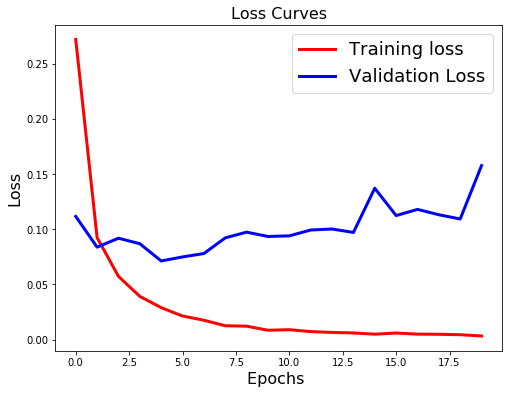

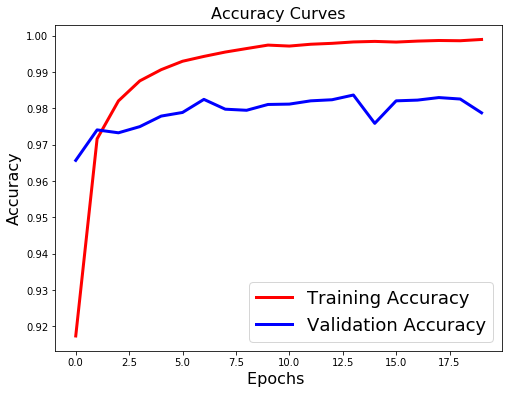

In [26]:
### ======== YOUR CODE HERE ========== ###

# Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

#### 10 - Regularization
If done properly, you will notice there is some overfitting in the model. To overcome this, we will use a regularization method called **dropout** which you will learn in the CNN lecture. This requires simply adding dropout layers into our model. To do so, repeat steps 5-8 with the following architecture.
- an input dense layer of 512 units using the ReLU activation function, with input dimension of 784
- a dropout layer with 0.5 dropout rate
- a dense layer of 512 units with the ReLU activation function
- a dropout layer with 0.5 dropout rate
- a output layer of 10 units with the softmax activation function (output layer)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 58us/step - loss: 0.3805 - acc: 0.8826 - val_loss: 0.1369 - val_acc: 0.9559
Epoch 2/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.1691 - acc: 0.9485 - val_loss: 0.0970 - val_acc: 0.9706
Epoch 3/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.1303 - acc: 0.9611 - val_loss: 0.0893 - val_acc: 0.9732
Epoch 4/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.1125 - acc: 0.9668 - val_loss: 0.0804 - val_acc: 0.9765
Epoch 5/20
60000/60000 [==============================] - 3s 47us/step - loss: 0.0978 - acc: 0.9708 - val_loss: 0.0803 - val_acc: 0.9768
Epoch 6/20
60000/60000 [==============================] - 3s 46us/step - loss: 0.0883 - acc: 0.9738 - val_loss: 0.0764 - val_acc: 0.9793
Epoch 7/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.0806 - acc: 0.9763 - val_loss: 0.0734 - val_acc

Text(0.5,1,'Accuracy Curves')

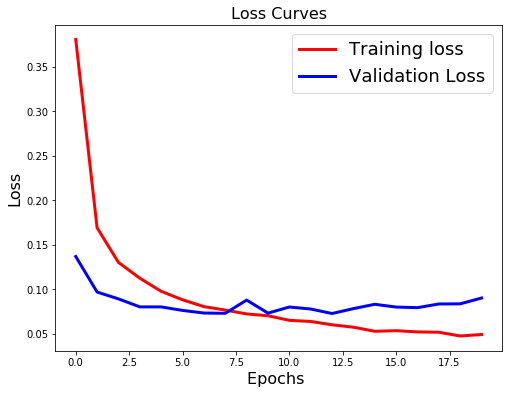

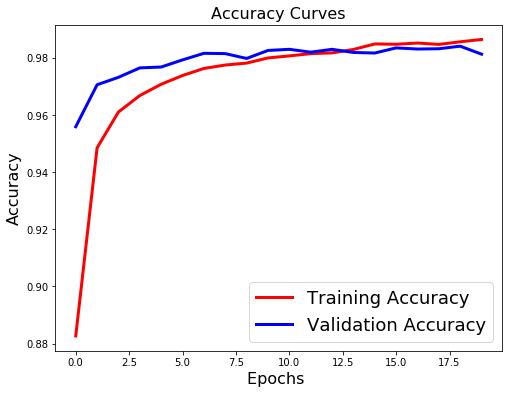

In [27]:
### ======== YOUR CODE HERE ========== ###

# Repeat step 5 with new architecture
model_reg = Sequential()
model_reg.add(Dense(512, activation='relu', input_shape=(dimData,)))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(512, activation='relu'))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(nClasses, activation='softmax'))

# Repeat step 6 with new model
model_reg.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Repeat step 7 with new model
history_reg = model_reg.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, 
                            validation_data=(test_data, test_labels_one_hot))

# Repeat step 8 with new model
[test_loss_reg, test_acc_reg] = model_reg.evaluate(test_data, test_labels_one_hot)
print("Evaluation Result on Test Data : Loss = {}, accuracy = {}".format(test_loss_reg, test_acc_reg))

# Repeat step 9 with new model
 
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['loss'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

plt.figure(figsize=[8,6])
plt.plot(history_reg.history['acc'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

#### BONUS QUESTION - Modified MNIST
The modified MNIST dataset consists of images that contain multiple written digits with background noise. The labels for this dataset is the largest digit contained in the image. Your challenge will be to train a feed forward network to predict these labels. You can follow the same steps as in this assignment to create the feed forward neural network, but you will likely have to experiment with different data preprocessing techniques and network structures. You will also need to load the dataset yourself and put it into a form that is acceptable by keras.

The dataset can be downloaded from (https://techx.blob.core.windows.net/modified-mnist/modified-mnist.zip)[here].